# CH40208 programming assessment worked example

Each part of this question is a variation on the same problem:
- Q1: Calculate the molecular orbitals and electronic energy for ethene (N=2, linear).
- Q2: Calculate the molecular orbitals and electronic energy for cyclopropene (N=3, cyclic).
- Q3: Calculate the molecular orbitals and electronic energies for butadiene (N=4, linear) and cyclobutadiens (N=4, cyclic).
- Q4: Calculate the molecular orbitals and electronic energies for hexatriene (N=6, linear) and benzene (N=6, cyclic).
- Q5: Calculate the electronic energies for N=2$\to$20 linear vs. cyclic.

Because this problem requires solving the same general problem multiple times, we will eventually need to write functions to do the heavy lifting. One approach is to write the functions at the start, but this requires having a good idea of what you are trying to do. Another approach is to start with the simpler problems *without* using functions, to build up your understanding, and then to generalise using functions later. 

In this example I will start off working *without* functions, and then add the functions in later to save repeating code.m

## 1.
**(a)** Construct the $2\times2$ Hamiltonian matrix, $\mathbf{H}$, for ethene (linear, $N = 2$), 
using values of $\alpha = 1.0$ and $\beta = −0.2$.

In [1]:
import numpy as np
from mo_plotting import plot_linear_mo, plot_cyclic_mo

In [2]:
a = 1.0
b = -0.2
H = np.array([[a, b],
              [b, a]])
print(H)

[[ 1.  -0.2]
 [-0.2  1. ]]


**(b)** Calculate the eigenvalues and eigenvectors of $\mathbf{H}$ using `np.linalg.eig()` (remembering that the eigenvectors are returned as columns of the second returned value).

In [3]:
np.linalg.eig(H)

(array([1.2, 0.8]), array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

This gives two arrays (see week 9). The first array is the eigenvalues of $\mathbf{H}$, and the second array contains the eigenvectors of $\mathbf{H}$.

In [4]:
eigenvalues = np.linalg.eig(H)[0]
eigenvectors = np.linalg.eig(H)[1]
print(eigenvalues)
print(eigenvectors)

[1.2 0.8]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


Show that there are two molecular orbitals with energies
\begin{eqnarray}
E_1 & = & \alpha + \beta \\
E_2 & = & \alpha - \beta.
\end{eqnarray}

We are told in the **Background** that  
&ldquo;The eigenvectors of $\mathbf{H}$ give coefficients $\left\{c_i\right\}$ in Equation 1, and the eigenvalues of $\mathbf{H}$ are their energies.&rdquo;  
$\to$ so the two *eigenvalues* we have calculated are the energies of the two molecular orbitals.

In [5]:
sorted_eigenvalues = np.sort(eigenvalues)
# Note the use of `np.sort()` to sort the eigenvalues into increasing order.
# We could alternatively have assigned these energies by eye, since we know beta is negative.
e1 = sorted_eigenvalues[0]
e2 = sorted_eigenvalues[1]

In [6]:
print(e1, a+b)
print(e2, a-b)

0.7999999999999999 0.8
1.2 1.2


The calculated energies are as expected (within numerical precision)

(c) Using the `plot_linear_mo()` function, plot the two molecular orbitals in order of increasing energy.

To plot the molecular orbitals we need to pass the `plot_linear_mo()` function a list of orbital coefficients.  
We are told in the **Background** that  
&ldquo;The eigenvectors of $\mathbf{H}$ give coefficients $\left\{c_i\right\}$ in Equation 1 &hellip;&rdquo;

The first eigenvector corresponds to the first eigenvalue / energy, of 1.2.  
The second eigenvector corresponds to the second eigenvalue / energy, of 0.8.

Here we need to remember to extract the *columns* of the *eigenvector* 2D array, as indicated in the questions:  
&ldquo;&hellip;remembering that the eigenvectors are returned as columns of the second returned value.&rdquo;

In [7]:
v1 = eigenvectors[:,1] # Using numpy slicing from week 9 to get the second *column*
v2 = eigenvectors[:,0] # Using numpy slicing from week 9 to get the first *column*

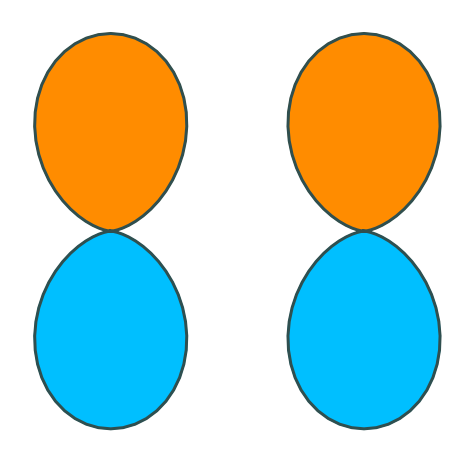

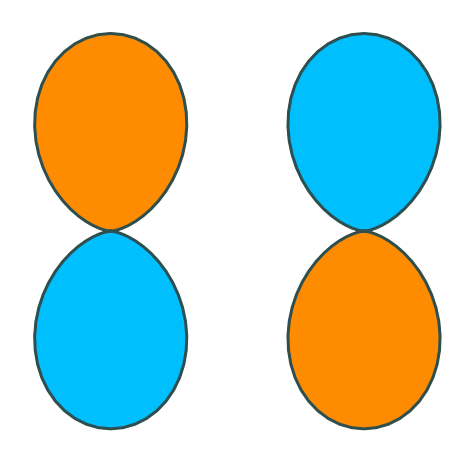

In [8]:
plot_linear_mo(v1)
plot_linear_mo(v2)

These are the bonding (top) and antibonding (bottom) $\pi$ orbitals of ethene.

(d) Using the molecular orbital energies calculated in 1b, calculate the total electronic energy for this molecule.  
Remember there is one $\pi$-electron per p-orbital.

For this part, we are told in the **Background** that  
&ldquo;The electronic energy of the π-electrons can be calculated by filling the molecular orbitals in order of increasing energy, with no more than two electrons in each orbital.&rdquo;  
Here $N=2$, so we have 2 electrons. These both occupy the lowest energy orbital, which has energy $E_1=0.8$.

In [9]:
print("electronic energy = {}".format(e1*2))

electronic energy = 1.5999999999999999


## 2  
This is the same as Q1, except we now have $N=3$, cyclic.

In [10]:
H = np.array([[a, b, b],
              [b, a, b],
              [b, b, a]])
eigenvalues = np.linalg.eig(H)[0]
eigenvectors = np.linalg.eig(H)[1]
print(np.sort(eigenvalues)) 
# We could also look at the unsorted eigenvalues and see that we have the numbers expected in the question.

[0.6 1.2 1.2]


\begin{eqnarray}
E_1 & = & \alpha + 2\beta & = & 0.6 \\
E_2 & = & \alpha - \beta & = & 1.2 \\
E_3 & = & \alpha - \beta & = & 1.2
\end{eqnarray}

In [11]:
print(eigenvalues)

[1.2 0.6 1.2]


If we inspect the *unsorted* eigenvalues, we see that the lowest energy is the second eigenvalue. This means the corresponding molecular orbital is given by the second eigenvector.

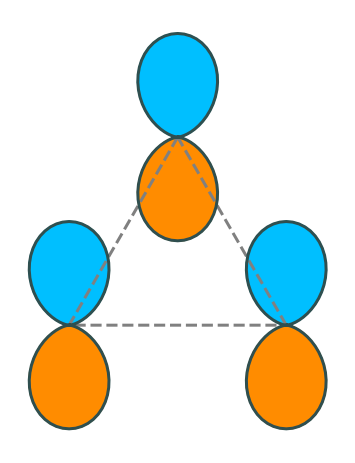

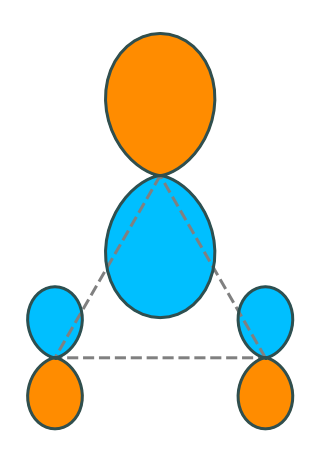

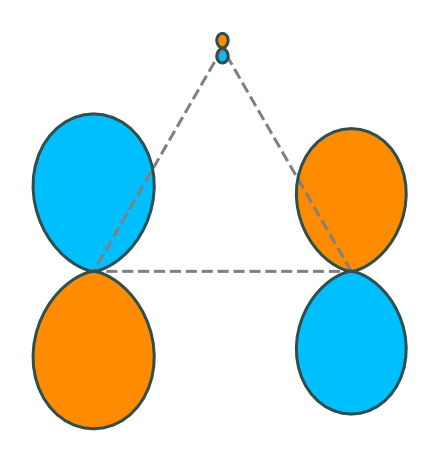

In [12]:
v1 = eigenvectors[:,1]
v2 = eigenvectors[:,0]
v3 = eigenvectors[:,2]
plot_cyclic_mo(v1)
plot_cyclic_mo(v2)
plot_cyclic_mo(v3)

1 bonding + 2 degenerate antibonding orbitals.

Calculating the electronic energy is a bit trickier here, because we have $N=3$. The lowest energy orbital is doubly occupied, and one of the two degenerate higher energy orbitals is singly occupied.

In [13]:
print('electronic energy = {}'.format(2*eigenvalues[1] + 1*eigenvalues[0]))

electronic energy = 2.3999999999999995


The same approach can be taken for parts 3 and 4, without using functions, and either sorting the energies in increasing order by hand, or by using the `np.sort` function.

This does become increasingly time consuming, and we will need some functions to help if we want to answer part 5.

From the first two questions, we can see that we want functions to do:
- Construct the matrix H.
- Calculate the electronic energy.

There are a few ways to construct the matrix H. We can do this with nested loops, or with `np.roll()`, or with `np.diag()`. Here I'll give the example of using `np.diag()`.

In [14]:
def linear_H(N):
    """Construct the Huckel theory electronic Hamiltonian for a linear molecule
    with N carbon atoms.
    
    Args:
        N (int): Number of carbon atoms
        
    Returns:
        (np.array): The 2D Hamiltonian matrix
    """
    a = 1.0
    b = -0.2
    diagonal = np.diag([a]*N) # e.g. if N=4, diagonal=[a, a, a, a]
    upper_diagonal = np.diag([b]*(N-1),  1) # e.g. if N=4, the upper diagonal is [b, b, b]
    lower_diagonal = np.diag([b]*(N-1), -1) # e.g. if N=4, the lower diagonal is [b, b, b]
    # diagonal, upper_diagonal, and lower_diagonal are each NxN arrays.
    # We can add these together using normal addition.
    H = diagonal + upper_diagonal + lower_diagonal
    return H

In [15]:
linear_H(4)

array([[ 1. , -0.2,  0. ,  0. ],
       [-0.2,  1. , -0.2,  0. ],
       [ 0. , -0.2,  1. , -0.2],
       [ 0. ,  0. , -0.2,  1. ]])

In [16]:
def cyclic_H(N):
    """Construct the Huckel theory electronic Hamiltonian for a cyclic molecule
    with N carbon atoms.
    
    Args:
        N (int): Number of carbon atoms
        
    Returns:
        (np.array): The 2D Hamiltonian matrix
    """
    a = 1.0
    b = -0.2
    # We already have most of the matrix from the linear case.
    H = linear_H(N)
    # But we want to add beta to the top right and bottom left elements.
    H[0,-1] = b
    H[-1,0] = b
    return H

In [17]:
cyclic_H(4)

array([[ 1. , -0.2,  0. , -0.2],
       [-0.2,  1. , -0.2,  0. ],
       [ 0. , -0.2,  1. , -0.2],
       [-0.2,  0. , -0.2,  1. ]])

In [18]:
# butadiene
H = linear_H(4)
eigenvalues = np.linalg.eig(H)[0]
eigenvectors = np.linalg.eig(H)[1]
print(eigenvalues)
# These are increasing order with elements [0], [1], [3], [2].

[0.6763932 0.8763932 1.3236068 1.1236068]


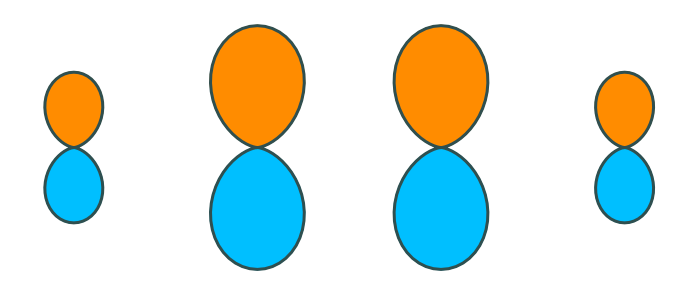

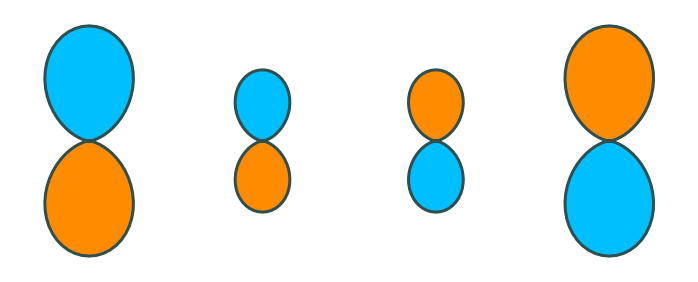

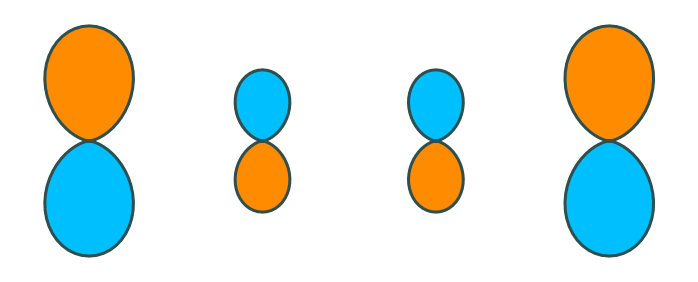

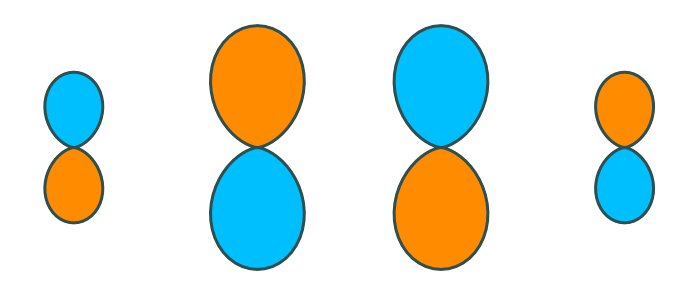

In [ ]:
plot_linear_mo(eigenvectors[:,0])
plot_linear_mo(eigenvectors[:,1])
plot_linear_mo(eigenvectors[:,3])
plot_linear_mo(eigenvectors[:,2])

In [ ]:
linear_E = 2*eigenvalues[0] + 2*eigenvalues[1]
print(linear_E)

3.1055728090000816


In [ ]:
# cyclobutadiene
H = cyclic_H(4)
eigenvalues = np.linalg.eig(H)[0]
eigenvectors = np.linalg.eig(H)[1]
print(eigenvalues)
# These are increasing order with elements [0], [1], [3], [2].

[0.6 1.  1.4 1. ]


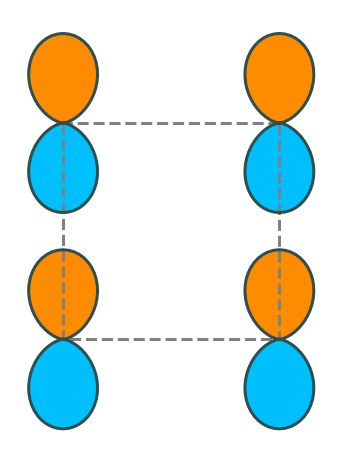

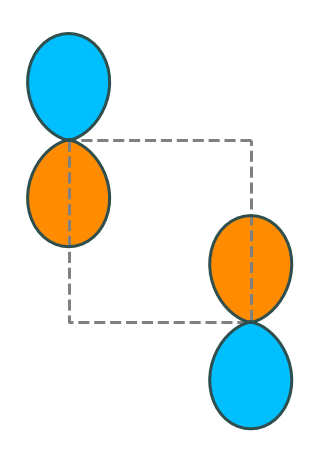

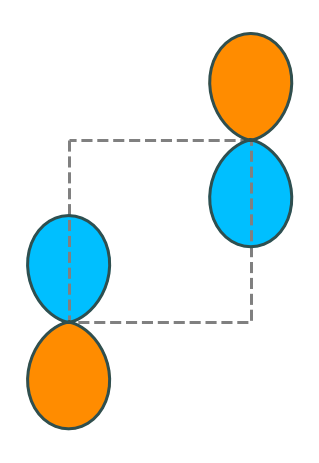

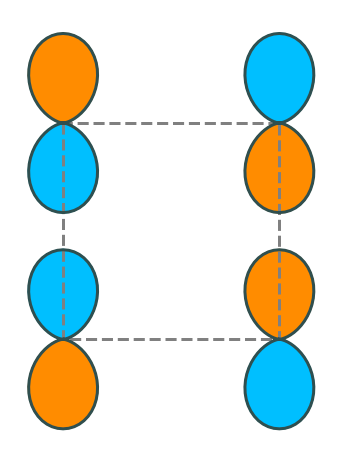

In [ ]:
plot_cyclic_mo(eigenvectors[:,0])
plot_cyclic_mo(eigenvectors[:,1])
plot_cyclic_mo(eigenvectors[:,3])
plot_cyclic_mo(eigenvectors[:,2])

In [ ]:
cyclic_E = 2*eigenvalues[0] + 2*eigenvalues[1]
print(cyclic_E)

3.200000000000003


The total electronic energy is lower for the linear molecule: 3.10557… < 3.2

## 4
… Repeating Q3, but for $N=6$…
If we really didn't want to write any functions, we could still build the matrices by hand and get the answers out at this stage. But as we have written our `linear_H` and `cyclic_H` functions, let's use those…

In [ ]:
# hexatriene
H = linear_H(6)
eigenvalues = np.linalg.eig(H)[0]
eigenvectors = np.linalg.eig(H)[1]
print(eigenvalues)
# These are increasing order with elements [0], [1], [2], [4], [5], [3].

[0.63961245 0.75060408 0.91099163 1.36038755 1.08900837 1.24939592]


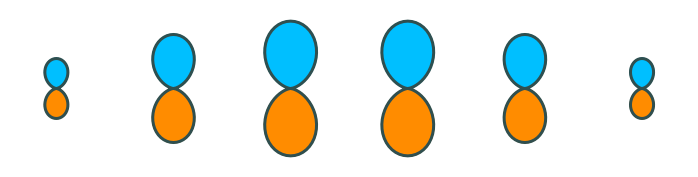

In [ ]:
plot_linear_mo(eigenvectors[:,0])
plot_linear_mo(eigenvectors[:,1])
plot_linear_mo(eigenvectors[:,2])
plot_linear_mo(eigenvectors[:,4])
plot_linear_mo(eigenvectors[:,5])
plot_linear_mo(eigenvectors[:,3])

In [ ]:
# Note the increasing nuber of nodes as the orbital energy increases.

In [ ]:
linear_E = 2*eigenvalues[0] + 2*eigenvalues[1] + 2*eigenvalues[2]
print(linear_E)

In [ ]:
# benzene
H = cyclic_H(6)
eigenvalues = np.linalg.eig(H)[0]
eigenvectors = np.linalg.eig(H)[1]
print(eigenvalues)
# These are increasing order with elements [0], [1], [4], [3], [5], [2].

In [ ]:
plot_cyclic_mo(eigenvectors[:,0])
plot_cyclic_mo(eigenvectors[:,1])
plot_cyclic_mo(eigenvectors[:,4])
plot_cyclic_mo(eigenvectors[:,3])
plot_cyclic_mo(eigenvectors[:,5])
plot_cyclic_mo(eigenvectors[:,2])

In [ ]:
cyclic_E = 2*eigenvalues[0] + 2*eigenvalues[1] + 2*eigenvalues[4]
print(cyclic_E)

In [ ]:
# E_cyclic < E_linear for N=6 (aromatic)

## 5
Part 5 we are asked to calculate E_cyclic - E_linear for N=1$\to$20, which we really do not want to do by hand. 

We now need a function to calculate the total electronic energy.

To do this we:
1. sort the eigenvalues / energies.
2. if N is even, we fill the first N/2 orbitals with 2 electrons each.
3. if N is odd, we fill the first N/2 - 1 orbitals with 2 electrons each, and put one electron in the next orbital.
We can test whether an integer is odd or even using the `//` integer division operator (see week 1 notes).  
Alternatively we could tackle this by writing one function for even N, and one function for odd N; then using one for `N=[2,4,6,8,10,12,14,16,18,20]` and one for `N=[3,5,7,9,11,13,15,17,19]`.

In [ ]:
def total_energy(N, energies):
    """Calculate the total energy for a conjugated hydrocarbon
    with N electrons.
    
    Args:
        N (int): The number of electrons.
        energies (np.array): The molecular orbital energies.
            The energies do not need to be sorted.
            
    Returns:
        (float): The total electronic energy.
        
    """
    sorted_energies = np.sort(energies)
    max_doubly_occupied = N//2
    if N // 2 == N / 2: # True, if N is even.
        total_energy = np.sum(2.0*sorted_energies[0:max_doubly_occupied])
    else: # N is odd
        total_energy = (np.sum(2.0*sorted_energies[0:max_doubly_occupied]) 
                        + sorted_energies[max_doubly_occupied])
    return total_energy
        
        

In [ ]:
# eigenvalues still contains the results for benzene calculated above
total_energy(6, eigenvalues) # get the same answer as in Q 4.

In [ ]:
# Let us test it for an odd system too
H = cyclic_H(3)
energies = np.linalg.eig(H)[0]
total_energy(3, energies) # get the same answer as in Q 2.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
all_N = np.arange(2,21)
e_differences = []
for N in all_N:
    H_linear = linear_H(N)
    H_cyclic = cyclic_H(N)
    energies_linear = np.linalg.eig(H_linear)[0]
    energies_cyclic = np.linalg.eig(H_cyclic)[0]
    e_diff = total_energy(N, energies_cyclic) - total_energy(N, energies_linear)
    e_differences.append(e_diff)

In [ ]:
plt.plot(all_N, e_differences, 'o')
plt.xticks(all_N)
plt.show()

In [ ]:
# Maximum stabilisation is for N=(2n+4) i.e. follows Huckel's rule.